# Petfinder EDA

Basic EDA on adopted dogs data returned from the Petfinder API. This notebook includes analysis and exploration of raw data returned from the Petfinder API (before any other cleaning has been applied to it).

To get the data evaluated in this notebook, you can either run the script in this Repository called `data_getter.py`, or you can download the data file produced by running this script from our [Code for Chicago Google Drive](https://drive.google.com/drive/u/0/folders/16YyhvVVQVecoBtmWOVZOR0rynGKkmYj_), and saving it to the location `rescuechi/petfinder/data/chicago_animals.pkl`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams["figure.figsize"] = (20, 10)

In [3]:
# this file results from running `get_animals` in petfinder/data_getter.py
df = pd.read_pickle("data/chicago_animals.pkl")

In [4]:
df.head()

,id,organization_id,url,type,species,breeds,colors,age,gender,size,...,organization_animal_id,photos,primary_photo_cropped,videos,status,status_changed_at,published_at,distance,contact,_links
0,37845448,IL608,https://www.petfinder.com/dog/mika-37845448/il...,Dog,Dog,"{'primary': 'Schnauzer', 'secondary': 'Poodle'...","{'primary': 'Gray / Blue / Silver', 'secondary...",Young,Female,Small,...,None,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,{'small': 'https://dl5zpyw5k3jeb.cloudfront.ne...,[],adopted,2017-05-11T17:41:38+0000,2017-04-13T22:22:16+0000,0.0033,"{'email': 'fcacfoster@gmail.com', 'phone': Non...","{'self': {'href': '/v2/animals/37845448'}, 'ty..."
1,37868394,IL608,https://www.petfinder.com/dog/luna-lulu-378683...,Dog,Dog,"{'primary': 'Shih Tzu', 'secondary': None, 'mi...","{'primary': 'White / Cream', 'secondary': 'Bla...",Young,Female,Small,...,None,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,{'small': 'https://dl5zpyw5k3jeb.cloudfront.ne...,[],adopted,2017-04-25T02:33:04+0000,2017-04-17T21:12:27+0000,0.0033,"{'email': 'fcacfoster@gmail.com', 'phone': Non...","{'self': {'href': '/v2/animals/37868394'}, 'ty..."
2,37868562,IL608,https://www.petfinder.com/dog/jack-37868562/il...,Dog,Dog,"{'primary': 'Maltese', 'secondary': 'Poodle', ...","{'primary': 'White / Cream', 'secondary': None...",Adult,Male,Small,...,None,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,{'small': 'https://dl5zpyw5k3jeb.cloudfront.ne...,[],adopted,2017-04-25T02:31:52+0000,2017-04-17T21:44:31+0000,0.0033,"{'email': 'fcacfoster@gmail.com', 'phone': Non...","{'self': {'href': '/v2/animals/37868562'}, 'ty..."
3,38338429,IL608,https://www.petfinder.com/dog/pinpon-38338429/...,Dog,Dog,"{'primary': 'Pug', 'secondary': None, 'mixed':...","{'primary': 'Yellow / Tan / Blond / Fawn', 'se...",Adult,Male,Small,...,None,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,{'small': 'https://dl5zpyw5k3jeb.cloudfront.ne...,[],adopted,2017-08-03T17:02:39+0000,2017-06-07T22:25:36+0000,0.0033,"{'email': 'fcacfoster@gmail.com', 'phone': Non...","{'self': {'href': '/v2/animals/38338429'}, 'ty..."
4,40204215,IL608,https://www.petfinder.com/dog/uncle-jesse-4020...,Dog,Dog,"{'primary': 'Pit Bull Terrier', 'secondary': N...","{'primary': 'Gray / Blue / Silver', 'secondary...",Adult,Male,Large,...,None,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,{'small': 'https://dl5zpyw5k3jeb.cloudfront.ne...,[],adopted,2018-02-06T19:38:45+0000,2017-12-14T19:41:06+0000,0.0033,"{'email': 'cpropsom@sbcglobal.net', 'phone': N...","{'self': {'href': '/v2/animals/40204215'}, 'ty..."


In [5]:
df.columns

Index(['id', 'organization_id', 'url', 'type', 'species', 'breeds', 'colors',
       'age', 'gender', 'size', 'coat', 'attributes', 'environment', 'tags',
       'name', 'description', 'organization_animal_id', 'photos',
       'primary_photo_cropped', 'videos', 'status', 'status_changed_at',
       'published_at', 'distance', 'contact', '_links'],
      dtype='object')

In [6]:
df.dtypes

id                          int64
organization_id            object
url                        object
type                       object
species                    object
breeds                     object
colors                     object
age                        object
gender                     object
size                       object
coat                       object
attributes                 object
environment                object
tags                       object
name                       object
description                object
organization_animal_id     object
photos                     object
primary_photo_cropped      object
videos                     object
status                     object
status_changed_at          object
published_at               object
distance                  float64
contact                    object
_links                     object
dtype: object

In [7]:
df["published_at"].head()

0    2017-04-13T22:22:16+0000
1    2017-04-17T21:12:27+0000
2    2017-04-17T21:44:31+0000
3    2017-06-07T22:25:36+0000
4    2017-12-14T19:41:06+0000
Name: published_at, dtype: object

In [8]:
# cast to datetime
df["published_at"] = pd.to_datetime(df["published_at"])


In [9]:
df["status_changed_at"] = pd.to_datetime(df["status_changed_at"])

In [10]:
df["length_of_stay"] = (df["status_changed_at"] - df["published_at"]).dt.days

In [11]:
df.describe()

,id,distance,length_of_stay
count,1.000000e+05,100000.000000,100000.000000
mean,3.372165e+07,17.980814,93.298240
std,1.173653e+07,8.557786,274.991584
min,9.910140e+05,0.003300,-1.000000
25%,2.484054e+07,11.304300,8.000000
50%,3.400091e+07,19.164700,18.000000
75%,4.297985e+07,25.621800,47.000000
max,5.566419e+07,30.098300,3957.000000


In [12]:
# explode the breeds column
df_breeds = df["breeds"].apply(pd.Series)
df_breeds.columns = [f"breed_{col}" for col in df_breeds.columns]


In [13]:
df_breeds.head()

,breed_primary,breed_secondary,breed_mixed,breed_unknown
0,Schnauzer,Poodle,True,False
1,Shih Tzu,None,False,False
2,Maltese,Poodle,True,False
3,Pug,None,False,False
4,Pit Bull Terrier,None,False,False


In [14]:
df = pd.concat([df.drop(["breeds"], axis=1), df_breeds], axis=1)

In [15]:
df.head()

,id,organization_id,url,type,species,colors,age,gender,size,coat,...,status_changed_at,published_at,distance,contact,_links,length_of_stay,breed_primary,breed_secondary,breed_mixed,breed_unknown
0,37845448,IL608,https://www.petfinder.com/dog/mika-37845448/il...,Dog,Dog,"{'primary': 'Gray / Blue / Silver', 'secondary...",Young,Female,Small,Medium,...,2017-05-11 17:41:38+00:00,2017-04-13 22:22:16+00:00,0.0033,"{'email': 'fcacfoster@gmail.com', 'phone': Non...","{'self': {'href': '/v2/animals/37845448'}, 'ty...",27,Schnauzer,Poodle,True,False
1,37868394,IL608,https://www.petfinder.com/dog/luna-lulu-378683...,Dog,Dog,"{'primary': 'White / Cream', 'secondary': 'Bla...",Young,Female,Small,Long,...,2017-04-25 02:33:04+00:00,2017-04-17 21:12:27+00:00,0.0033,"{'email': 'fcacfoster@gmail.com', 'phone': Non...","{'self': {'href': '/v2/animals/37868394'}, 'ty...",7,Shih Tzu,None,False,False
2,37868562,IL608,https://www.petfinder.com/dog/jack-37868562/il...,Dog,Dog,"{'primary': 'White / Cream', 'secondary': None...",Adult,Male,Small,Medium,...,2017-04-25 02:31:52+00:00,2017-04-17 21:44:31+00:00,0.0033,"{'email': 'fcacfoster@gmail.com', 'phone': Non...","{'self': {'href': '/v2/animals/37868562'}, 'ty...",7,Maltese,Poodle,True,False
3,38338429,IL608,https://www.petfinder.com/dog/pinpon-38338429/...,Dog,Dog,"{'primary': 'Yellow / Tan / Blond / Fawn', 'se...",Adult,Male,Small,Short,...,2017-08-03 17:02:39+00:00,2017-06-07 22:25:36+00:00,0.0033,"{'email': 'fcacfoster@gmail.com', 'phone': Non...","{'self': {'href': '/v2/animals/38338429'}, 'ty...",56,Pug,None,False,False
4,40204215,IL608,https://www.petfinder.com/dog/uncle-jesse-4020...,Dog,Dog,"{'primary': 'Gray / Blue / Silver', 'secondary...",Adult,Male,Large,Short,...,2018-02-06 19:38:45+00:00,2017-12-14 19:41:06+00:00,0.0033,"{'email': 'cpropsom@sbcglobal.net', 'phone': N...","{'self': {'href': '/v2/animals/40204215'}, 'ty...",53,Pit Bull Terrier,None,False,False


In [16]:
df["breed_primary"].value_counts()

Labrador Retriever      14242
Pit Bull Terrier         7979
Beagle                   4932
Chihuahua                4898
Terrier                  4230
                        ...  
Wirehaired Dachshund        1
Aussiedoodle                1
Spanish Water Dog           1
Puli                        1
Irish Water Spaniel         1
Name: breed_primary, Length: 233, dtype: int64

In [17]:
df_agg = df.groupby("breed_primary")["length_of_stay"].agg(["median", "count"])

In [18]:
df_agg

,median,count
breed_primary,,
Affenpinscher,19.0,22
Afghan Hound,9.5,4
Airedale Terrier,15.0,95
Akbash,4.0,1
Akita,54.5,232
...,...,...
Wirehaired Dachshund,6.0,1
Wirehaired Pointing Griffon,20.0,6
Wirehaired Terrier,15.0,210


<AxesSubplot:>

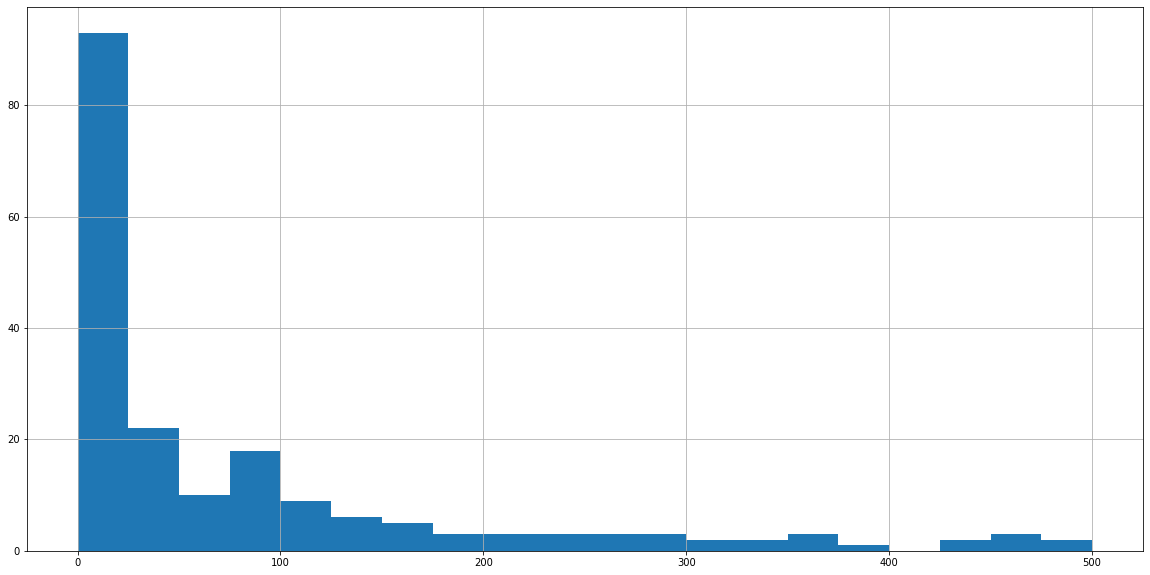

In [19]:
# many rare breeds
df_agg["count"].hist(range=(0,500), bins=20)

In [20]:
# remove rare breeds
df_agg.loc[df_agg["count"]>25].sort_values(by="median", ascending=False).head(50)

,median,count
breed_primary,,
English Pointer,563.5,450
English Setter,409.5,484
Staffordshire Bull Terrier,64.0,259
American Staffordshire Terrier,61.0,1942
Akita,54.5,232
American Eskimo Dog,48.0,478
Bichon Frise,41.0,728
Treeing Walker Coonhound,39.0,229
German Shorthaired Pointer,39.0,153


In [21]:
# remove rare breeds
df_agg.loc[df_agg["count"]>25].sort_values(by="median", ascending=False).tail(50)

,median,count
breed_primary,,
Wire Fox Terrier,15.0,75
Basset Hound,15.0,554
Australian Cattle Dog / Blue Heeler,15.0,2302
Wirehaired Terrier,15.0,210
Plott Hound,15.0,295
Hound,15.0,2035
Black Mouth Cur,15.0,88
Bloodhound,15.0,146
Papillon,15.0,176


In [22]:
df_agg.columns

Index(['median', 'count'], dtype='object')

<AxesSubplot:xlabel='count', ylabel='median'>

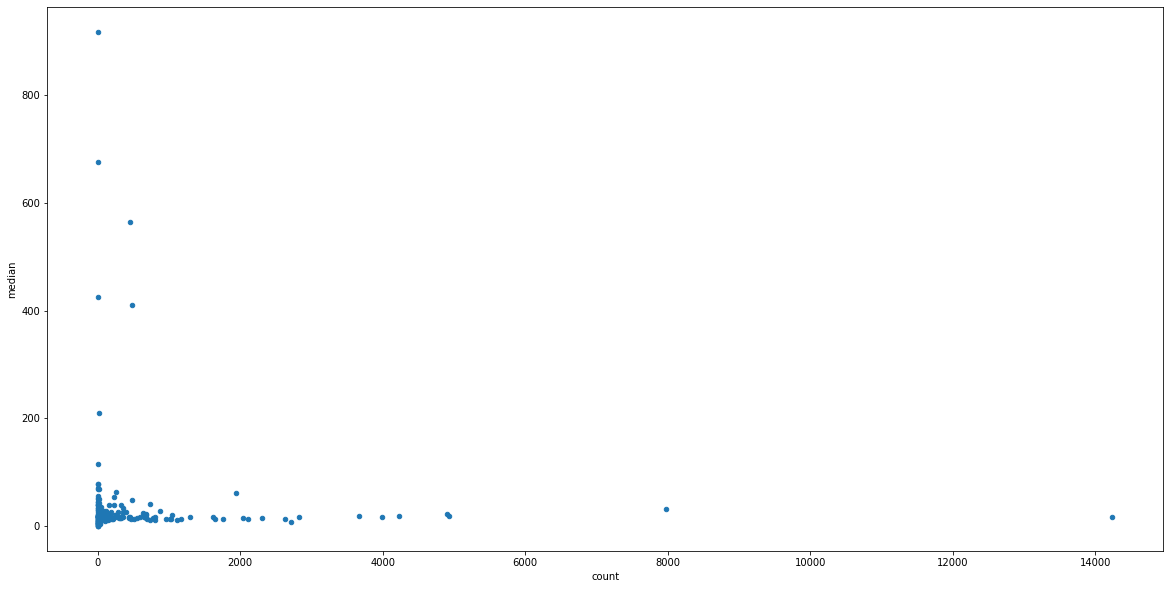

In [23]:
df_agg.plot.scatter(x="count", y="median")

In [24]:
# take the 25 most frequent breeds
df_common_breeds = df_agg.sort_values(by="count", ascending=False).head(25)

Text(0.5, 1.0, 'Shelter Duration of 25 Most Common Primary Breeds')

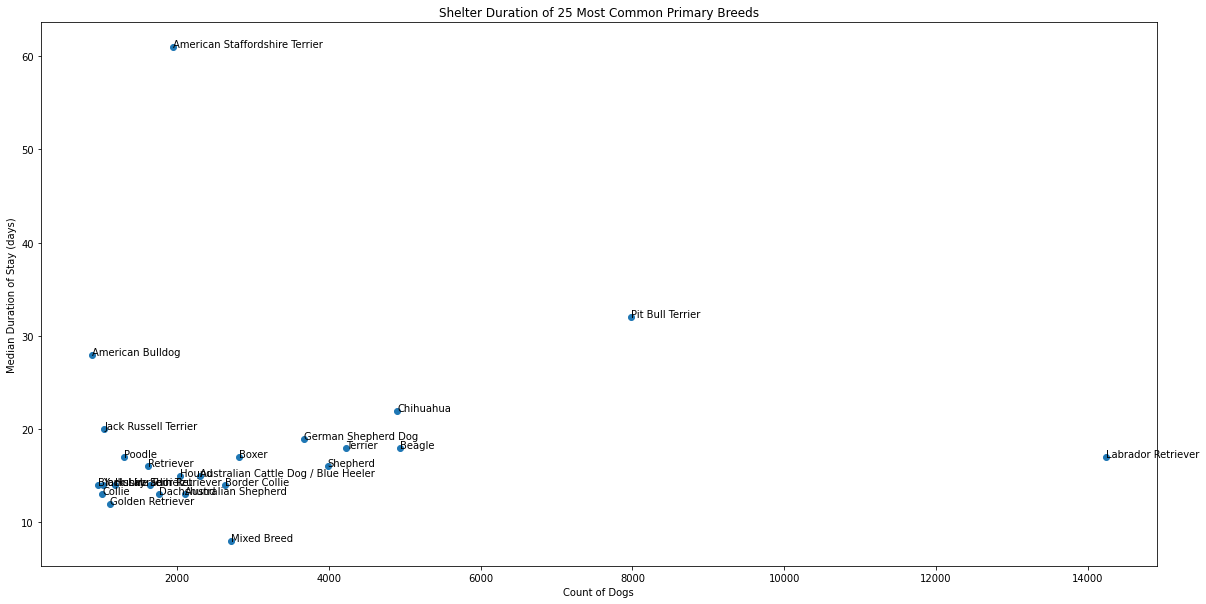

In [25]:
fig, ax = plt.subplots()
ax.scatter(df_common_breeds["count"], df_common_breeds["median"])
for i, txt in enumerate(df_common_breeds.index):
    ax.annotate(txt, (df_common_breeds["count"].iloc[i], df_common_breeds["median"].iloc[i]))
plt.xlabel("Count of Dogs")
plt.ylabel("Median Duration of Stay (days)")
plt.title("Shelter Duration of 25 Most Common Primary Breeds")

In [26]:
top_breeds = df_common_breeds.index

In [27]:
df_limited_to_common = df.loc[df["breed_primary"].isin(top_breeds), :]

In [28]:
# sort medians per breed
medians = df_limited_to_common.groupby("breed_primary")["length_of_stay"].median().sort_values(ascending=False)

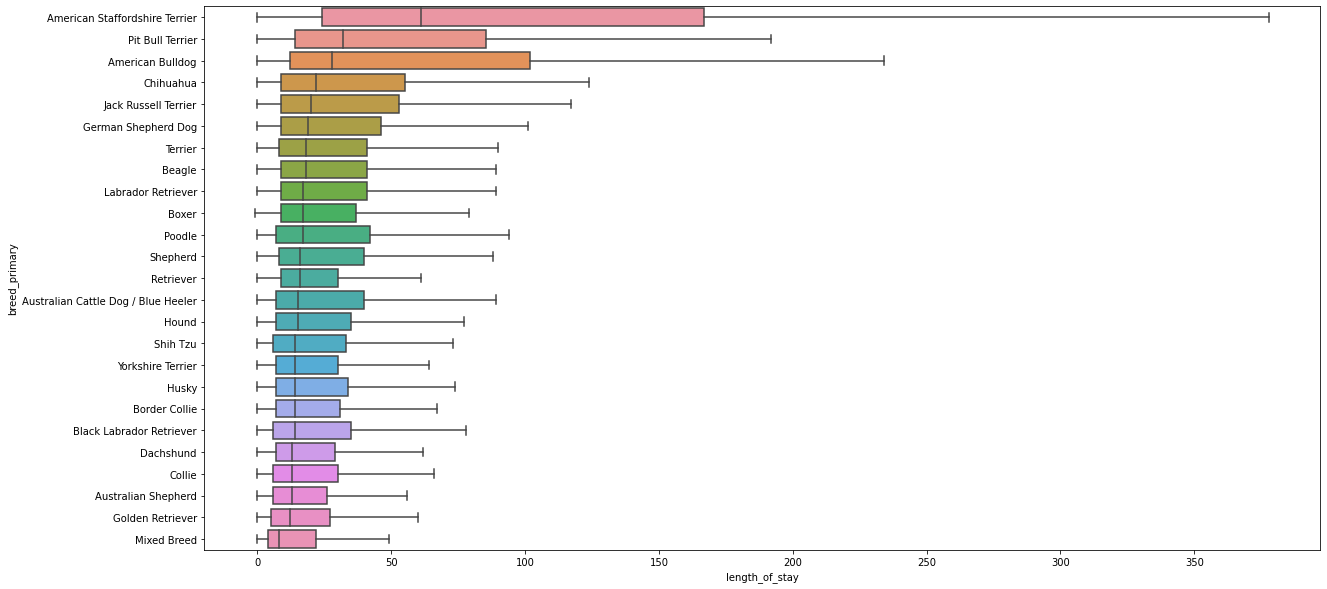

In [29]:
ax = sns.boxplot(y="breed_primary", x="length_of_stay", data=df_limited_to_common, showfliers=False, order=medians.index)
# plt.xticks(rotation=90)